<a href="https://colab.research.google.com/github/JuniorHZ19/HerramientasIA/blob/main/caragatomerjoar1.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@markdown # *0) ** Instalando libreria(OBLIGATORIO)

!pip install torch torchvision torchaudio
!pip install google_images_download

In [2]:
#@markdown # *1) ** Descargando DataSet  caras gatos(OBLIGATORIO)
import zipfile

nombre_zip="data_set_gatos.zip"

directorio_destino="/content/"

!gdown --id 1EK7H_QJqxDy0wBssMEi2_gWdo3zE2pmQ -O {nombre_zip}

with zipfile.ZipFile(nombre_zip, 'r') as zip_ref:
    zip_ref.extractall(directorio_destino)


/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1EK7H_QJqxDy0wBssMEi2_gWdo3zE2pmQ
To: /content/data_set_gatos.zip
100% 284M/284M [00:02<00:00, 99.1MB/s]


In [3]:
#@markdown # *1) ** Clase Para manejo de directorios de datasets de imagenes


import os
import cv2
import pandas as pd
from PIL import Image
# Recorre el directorio  y elmiina los archvios que no tiene las extensioens permitidas

class DataSetManage:

 def comprobar_ext_directorios(self,directorios):

  for clase,[directorio,etiquetas] in(directorios.items()):
   lista_directorio=os.listdir(directorio)
   self.validarExt(directorio)



 def  validarExt(self,directorio):
  print(directorio)
   # Extensiones permitidas
  extensiones_permitidas = {".jpg", ".jpeg", ".png"}
  for root, dirs, files in os.walk(directorio):

    for file in files:
        # Obtiene la extensión del archivo
        _, extension = os.path.splitext(file)

        # Verifica si la extensión no está en la lista de extensiones permitidas y elimina el archivo
        if extension.lower() not in extensiones_permitidas:
            archivo_a_eliminar = os.path.join(root, file)
            os.remove(archivo_a_eliminar)
            print(f"Se eliminó: {archivo_a_eliminar}")


# Cambia nombre de cada archivo dentro del directorio a un valor secuencial

 def cambiar_nombres_directorios(self,directorios):
   for clase,[directorio,etiquetas] in(directorios.items()):
     lista_directorio=os.listdir(directorio)
     self.cambiarNombre(directorio,clase)


 def cambiarNombre(self,directorio,subfijo):
  archivos_en_directorio = os.listdir(directorio)
  for i, archivo in enumerate(archivos_en_directorio, start=1):
    # Construir el nuevo nombre del archivo
    nuevo_nombre = f"{subfijo}{i}{os.path.splitext(archivo)[1]}"

    # Ruta completa del archivo antiguo y nuevo
    ruta_antigua = os.path.join(directorio, archivo)
    ruta_nueva = os.path.join(directorio, nuevo_nombre)

    # Cambiar el nombre del archivo
    os.rename(ruta_antigua, ruta_nueva)
    print(f"Se cambió el nombre de {ruta_antigua} a {ruta_nueva}")


#Obtiene la cantidad de elemntos que tiene la carpeta

 def len_directorio(self,directorio):
    cantidad_elementos = sum(1 for elemento in os.listdir(directorio) if os.path.isfile(os.path.join(directorio, elemento)))
    return cantidad_elementos


#----------------------------------------------------------------------------------------------

#Valida si la imagen se puede leer usando  pill o cv2 si no se puede leer se elimina

 def validar_Img_Pill(self,directorios,):
  for etiqueta,[directorio,clase] in(directorios.items()):

    lista_paths=os.listdir(directorio)
    self.validarLecturaImgPill(directorio,lista_paths)
  print(f"Se ah validado todas las imagenes")

 def validar_Img_cv2(self,directorios):
  for etiqueta,[directorio,clase] in(directorios.items()):

    lista_paths=os.listdir(directorio)
    self.validarLecturaImg(directorio,lista_paths)
  print(f"Se ah validado todas las imagenes")


 def validarLecturaImg(self,directorio,lista):

  for ruta in(lista):
   imagen=cv2.imread(directorio+ruta)
   if  imagen is None:
     os.remove(directorio+ruta)
     print(f"No se pudo leer y se elimino archivo:{directorio+ruta}")

 def validarLecturaImgPill(self,directorio,lista):
    for ruta in(lista):
     try:
      imagen=Image.open(directorio+ruta)
     except Exception as e:
      os.remove(directorio+ruta)
      print(f"Archivo '{directorio+ruta}' eliminado.")



#vamos a recorrer el dicionario y validar ruta por ruta si se puede leer sino se elminara
#vamos guaradno al mismo tiempo 3 listas, los directorios , listas de paths de los directiros y de las clases ,para usarlo luego usarlo al crear el csv

 def separar_datos_directorios(self,directorios):
  listas_directorios=[]
  listas_listas_directorios=[]
  listas_clases=[]

  for etiqueta,[directorio,clase] in(directorios.items()):

       lista_paths=os.listdir(directorio)
       listas_directorios.append(directorio)
       listas_listas_directorios.append(lista_paths)
       listas_clases.append(clase)

  return listas_directorios,listas_listas_directorios,listas_clases

 def emparejar_listas_paths(self,lista_listas):

   #Tomamos el minimo tamaño dentro de las lista de cada clase
   tamaño_minimo = min(len(arr) for arr in lista_listas)

   #Vamos a emparejar todas las listas con un tamaño igual que sea la del minimo tamaño de todas,esto para tener un set de datos parejo por cada clase
   Reducido_lista_paths=[]

   #Reduce cada lista de los paths a la cantidad minimo para que todos tenga iaugal cantidad
   for listas in(lista_listas):
    Reducido_lista_paths.append(listas[:tamaño_minimo])

   return Reducido_lista_paths
#---------------------------------------------------------------------------------


 def crear_paths_csv(self,directorio_base,lista_paths,clases,nombre_archivo):

   columnas=["path","etiqueta"]
   datos_csv=[]

   for dir_base,dir_path,clase in  zip(directorio_base,lista_paths,clases):

    for path  in (dir_path):

     datos_csv.append([dir_base+path ,clase])


   df_lista=pd.DataFrame(datos_csv,columns=columnas)
   df_lista.to_csv(nombre_archivo,index=False)
   print("Csv Creado")
#---------------------------------------------------------------------------------

#devuelve cuatnos elemtnos tiene cada clase
 def total_elementos(self,directorios,csv_path):
    df=pd.read_csv(csv_path)
    for clase,[directorio,etiqueta] in (directorios.items()):
     tamaño_etiqueta=(df["etiqueta"] == etiqueta).sum()
     print(f"la clase {clase} tiene :{tamaño_etiqueta} elementos")



In [4]:
dmg=DataSetManage()

directorios={
     "gato":["/content/Cat-faces-dataset-master/dataset-part1/dataset-part1/",1],
     "gato":["/content/Cat-faces-dataset-master/dataset-part2/dataset-part2/",1],
     "gato":["/content/Cat-faces-dataset-master/dataset-part3/dataset-part3/",1]


}


dmg.comprobar_ext_directorios(directorios)

dmg.cambiar_nombres_directorios(directorios)

dmg.validar_Img_Pill(directorios)

listas_directorios,listas_paths_directorios,listas_clases=dmg.separar_datos_directorios(directorios)

Reducido_lista_paths=dmg.emparejar_listas_paths(listas_paths_directorios)
#validamos que todas las iamgnes en nuestro direcotrios puedan abrirse con openia cv2



#La funcion que creamos para podre crear nuestro csv , con los parametros antes calucaldos que son 3 listas y el nombre del csv

Dataset_csv="Data_set.csv" #nombre que tendla nuestlo csv
dmg.crear_paths_csv(listas_directorios,Reducido_lista_paths,listas_clases,Dataset_csv)

#imprime total de elemtnos por clase
dmg.total_elementos(directorios,"/content/Data_set.csv")

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Se cambió el nombre de /content/Cat-faces-dataset-master/dataset-part3/dataset-part3/cat_23160.png a /content/Cat-faces-dataset-master/dataset-part3/dataset-part3/gato4847.png
Se cambió el nombre de /content/Cat-faces-dataset-master/dataset-part3/dataset-part3/cat_27170.png a /content/Cat-faces-dataset-master/dataset-part3/dataset-part3/gato4848.png
Se cambió el nombre de /content/Cat-faces-dataset-master/dataset-part3/dataset-part3/cat_23892.png a /content/Cat-faces-dataset-master/dataset-part3/dataset-part3/gato4849.png
Se cambió el nombre de /content/Cat-faces-dataset-master/dataset-part3/dataset-part3/cat_25783.png a /content/Cat-faces-dataset-master/dataset-part3/dataset-part3/gato4850.png
Se cambió el nombre de /content/Cat-faces-dataset-master/dataset-part3/dataset-part3/cat_20583.png a /content/Cat-faces-dataset-master/dataset-part3/dataset-part3/gato4851.png
Se cambió el nombre de /content/Cat-faces-dataset-mas

In [14]:
#@markdown # *2) ** Creacion de clase DATASET(OBLIGATORIO)
import torch
from torch.utils.data import Dataset,DataLoader
import pandas as pd
import numpy as np
import cv2
from PIL import Image


class MiDataSet(Dataset):

  def __init__(self,csv_file, transform=None):


     self.data=pd.read_csv(csv_file)

     self.x=self.data["path"]
     self.y=self.data["etiqueta"]

     self.transform=transform

     self.samples=self.data["path"].shape[0]

  def __getitem__(self,id):

    rut_imagen=self.x[id]
    imagen=cv2.imread(rut_imagen)
    etiqueta=self.y[id]


    if imagen is None:
      pillow_image = Image.open(rut_imagen)
      numpy_image = np.array(pillow_image)
      imagen=cv2.cvtColor(numpy_image, cv2.COLOR_RGB2BGR)


    imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)


    if self.transform:
      imagen_rgb = self.transform(imagen_rgb)

    return imagen_rgb,etiqueta


  def __len__(self):
   return self.samples





In [152]:
#@markdown # *0) ** Creando clase Discriminadora y Geneaadora:

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
from torch.utils.data import Dataset,DataLoader
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter
import torch.nn.functional as F

class Discriminator (nn.Module):
  def __init__(self,input_size):
   super(Discriminator,self).__init__()

   self.conv1=nn.Conv2d(3,48,kernel_size=3,stride=1)
   self.batchnor1=nn.BatchNorm2d(48)

   self.conv2=nn.Conv2d(48,56,kernel_size=3,stride=1)
   self.batchnor2=nn.BatchNorm2d(56)

   self.maxpol1=nn.MaxPool2d(kernel_size=2,stride=1)

   self.flatt=nn.Flatten()

   self.oculta1=nn.Linear(194936,500)
   self.salida= nn.Linear(500,1)

  def forward(self,x):

    x=self.conv1(x)
    x=self.batchnor1(x)
    x= F.relu(x)

    x=self.conv2(x)
    x=self.batchnor2(x)
    x= F.relu(x)



    x=self.flatt(x)
    x=self.oculta1(x)
    x= F.relu(x)

    x=self.salida(x)
    out=torch.sigmoid(x)

    return out

#------------------------------------------------------------------------
class Generador(nn.Module):

  def __init__(self,z_dim,output_size):
   super(Generador,self).__init__()

   self.lineal1=nn.Linear(z_dim,7*7*256)

   self.tconv1=nn.ConvTranspose2d(256,128,kernel_size=3,stride=2, bias=False)
   self.bacthnorm1=nn.BatchNorm2d(128)

   self.tconv2=nn.ConvTranspose2d(128,64,kernel_size=3,stride=2, bias=False)
   self.bacthnorm2=nn.BatchNorm2d(64)

   self.tconv3=nn.ConvTranspose2d(64,3,kernel_size=3,stride=2, bias=False)


  def forward(self,x):

    x=self.lineal1(x)
    x= F.relu(x)

    x=x.view(-1, 256, 7, 7)

    x= self.tconv1(x)
    x=self.bacthnorm1(x)
    x= F.relu(x)

    x= self.tconv2(x)
    x=self.bacthnorm2(x)
    x= F.relu(x)

    x= self.tconv3(x)

    out= torch.tanh(x)

    return out






In [150]:
import sklearn
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset


if torch.cuda.is_available():
    print("CUDA está disponible.")
    device = torch.device("cuda")
else:
    print("CUDA no está disponible. Se utilizará la CPU.")
    device = torch.device("cpu")

transformaciones = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
    transforms.Resize((63, 63),antialias=True)

])


lr=0.00001
batch_size=32
dim_vector_ruido =100
image_dim=63*63*3 #dimensiones de la imagen que entrara al discrimiador
num_epochs=200


Dataset=MiDataSet("/content/Data_set.csv",transform=transformaciones)
data_loader=DataLoader(Dataset,batch_size=batch_size,shuffle=True)


d=Discriminator(image_dim).to(device)
g=Generador(dim_vector_ruido,image_dim).to(device)

fixed_noise=torch.randn((batch_size,dim_vector_ruido)).to(device)


d_optimizer=optim.Adam(d.parameters(),lr=lr)
g_optimizer=optim.Adam(g.parameters(),lr=lr)

criterio=nn.BCELoss()




CUDA está disponible.


Epoch [0/200], Step [0/308], Discriminator Loss: 1.3633, Generator Loss: 0.7617
Epoch [0/200], Step [100/308], Discriminator Loss: 0.0015, Generator Loss: 8.2153
Epoch [0/200], Step [200/308], Discriminator Loss: 0.0007, Generator Loss: 9.1527
Epoch [0/200], Step [300/308], Discriminator Loss: 0.0004, Generator Loss: 10.0955


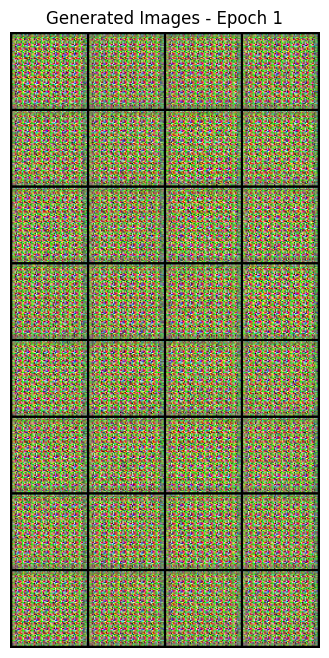

Epoch [1/200], Step [0/308], Discriminator Loss: 0.0004, Generator Loss: 9.9396
Epoch [1/200], Step [100/308], Discriminator Loss: 0.0005, Generator Loss: 9.9104
Epoch [1/200], Step [200/308], Discriminator Loss: 0.0004, Generator Loss: 10.7613
Epoch [1/200], Step [300/308], Discriminator Loss: 0.0004, Generator Loss: 10.1490


KeyboardInterrupt: ignored

In [151]:
import matplotlib.pyplot as plt
import torchvision.utils as vutils

# ...

# Supongamos que ya has definido las instancias de los modelos Generador (g) y Discriminador (d),
# y has configurado los optimizadores (g_optimizer y d_optimizer) y la función de pérdida (criterio).

for epoch in range(num_epochs):
    for i, (x, y) in enumerate(data_loader):
        g.eval()
        d.train()

        batch_size = x.size(0)  # Se cambió de y a x para ser consistente con el uso de las imágenes reales
        real_images = x.to(device)
        real_labels = y.view(-1, 1).float().to(device)

        # Entrenar el discriminador con imágenes reales
        d_optimizer.zero_grad()
        prediction_real = d(real_images)
        real_loss = criterio(prediction_real, real_labels)
        real_loss.backward()

        # Entrenar el discriminador con imágenes generadas
        noise = torch.randn(batch_size, dim_vector_ruido).to(device)
        fake_images = g(noise).detach()
        fake_labels = torch.zeros(batch_size, 1).to(device)
        prediction_fake = d(fake_images)
        fake_loss = criterio(prediction_fake, fake_labels)
        fake_loss.backward()

        discriminator_loss = real_loss + fake_loss
        d_optimizer.step()

        # Entrenar el generador
        g.train()
        d.eval()

        g_optimizer.zero_grad()
        generated_images = g(noise)
        generator_loss = criterio(d(generated_images), real_labels)
        generator_loss.backward()
        g_optimizer.step()

        if i % 100 == 0:
            print(f'Epoch [{epoch}/{num_epochs}], Step [{i}/{len(data_loader)}], '
                  f'Discriminator Loss: {discriminator_loss.item():.4f}, '
                  f'Generator Loss: {generator_loss.item():.4f}')

    # Imprimir estadísticas y visualizar imágenes generadas al final de cada época
    with torch.no_grad():
        g.eval()
        noise = torch.randn(32, dim_vector_ruido).to(device)
        generated_images = g(noise).detach().cpu()

        # Convertir las imágenes al rango [0, 1]
        generated_images = (generated_images + 1) / 2.0

        # Visualizar las imágenes generadas
        plt.figure(figsize=(8, 8))
        plt.axis("off")
        plt.title(f"Generated Images - Epoch {epoch + 1}")
        plt.imshow(vutils.make_grid(generated_images, nrow=4).permute(1, 2, 0).numpy())
        plt.show()


In [ ]:
torch.save(g.state_dict(), 'modelo_gatos_g.pt')
torch.save(d.state_dict(), 'modelo_gatos_d.pt')

In [ ]:
# Suponiendo que "Generador" es la clase de tu generador y "ruta_modelo" es la ruta del modelo guardado
generador = Generador(80, 63*63*3)  # Ajusta input_size y output_size según tu implementación
generador.load_state_dict(torch.load("modelo_gatos_g.pt"))
generador.to(device)
generador.eval()

with torch.no_grad():
    generador.eval()
    noise = torch.randn(1, dim_vector_ruido).to(device)
    generated_image = generador(noise).detach().cpu()

# Convertir la imagen al rango [0, 1]
generated_image = (generated_image + 1) / 2.0

generated_image_np = generated_image.squeeze().permute(1, 2, 0).numpy()

print(generated_image.shape)
# Visualizar la imagen generada
plt.imshow(generated_image_np)
plt.axis('off')
plt.show()